# Quantitative investigation into the shape of the waveform

## Section 1 - Import code and make definitions

## Section 2 - Calculate tmax and Qc

## Section 3 - Comparison Figures

## Section 4 - Figures for Quantitative Estimates 

## Section 5 - Comparing to Blanchette-Guertin 2012.

## Section 6 - Test of estimate of decay time code

### Before running for the first time you will need to execute Code Block 1 in TauP_plots.ipynb

### The simulations are stored at the Zenodo repository https://doi.org/10.5281/zenodo.10631693 

### You will need to extract the simulations and store them in top_dir
### e.g. if you have a folder called 128b_VPREMOON_atten_surface_2 and it is in /Users/cnunn/lunar_data/axisem3d_runs/ then the top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'

## Section 1 - Import code and make definitions

In [1]:
# %matplotlib notebook
%matplotlib inline

# calculate the taup models
from obspy.taup import TauPyModel
import time
import math
import pandas as pd
import os

calculated_VPREMOON = TauPyModel(model='VPREMOON_atten_taup')
calculated_ISSI_M1 = TauPyModel(model='ISSI_MOON_M1_atten_taup')
calculated_VPREMOON_atten_no_LVZ_taup = TauPyModel(model='VPREMOON_atten_no_LVZ_taup')

calculated_taup_dict =	{
  "VPREMOON_taup": calculated_VPREMOON,
  "ISSI_MOON_M1_taup": calculated_ISSI_M1,
    'VPREMOON_atten_no_LVZ_taup':calculated_VPREMOON_atten_no_LVZ_taup
}

from obspy.core import Stream, UTCDateTime
from obspy import read_inventory

from postprocessing_util_observations import get_observations_local
from postprocessing_util import get_all_streams_from_netcdf
from postprocessing_util import plot_epicentral_distance_taup
from postprocessing_util import plot_envelope_taup
from postprocessing_util import plot_envelope_taup_quantitative 

import matplotlib.pyplot as plt
import numpy as np

phase_list_ISSI = ["P", "PP", "PS", "PSS", "2.15kmps","0.57kmps"]
phase_list_VPREMOON_layered = [
    "P",
    "PS",
    "2.47kmps",
    "0.77kmps",
    "0.47kmps"
]

phase_list_VPREMOON_layered_no_LVZ = [
    "P",
    "PS",
    "2.27kmps",
    "1.66kmps",
    "1.21kmps"
]




distance_examples={
    2:2.167025997371414,
    5:5.075044339909034,
    25:25.432357813795228,
    28:28.047339965833054,
    34:34.560784470873635,
    57:57.67071530277473
}
    
# epicentral distances of the events used     
# A13/S-IVB 4.480908613215989
# A14/S-IVB 5.783787517596895
# A15/S-IVB 11.718510058287118
# A15/S-IVB 6.118664372615061
# A16/S-IVB 5.075044339909034
# A16/S-IVB 9.054122437295218
# A16/S-IVB 36.37690556827287
# A17/S-IVB 11.13215379702135
# A17/S-IVB 5.161473408558756
# A17/S-IVB 34.01814904542429
# A17/S-IVB 28.047339965833054
# A12/LM 2.4252731172780972
# A14/LM 3.8036577155384563
# A14/LM 2.167025997371414
# A15/LM 37.23510859020209
# A15/LM 34.560784470873635
# A15/LM 3.0396554713670882
# A17/LM 57.67071530277473
# A17/LM 52.68194068762792
# A17/LM 25.432357813795228
# A17/LM 32.48706382198207

# some nice colors for the filtered plots
col1 = (0.4, 0.7607843137254902, 0.6470588235294118) # 0.1 - 0.2 
col2 = (0.9882352941176471, 0.5529411764705883, 0.3843137254901961) # 0.4 - 0.5 
col3 = (0.5529411764705883, 0.6274509803921569, 0.796078431372549) # 0.8 - 0.9
# col4 = (0.9058823529411765, 0.5411764705882353, 0.7647058823529411)


In [2]:
# location of the data 

catalogs=['input_files/Nunn_2024_artificial_impacts_picks.xml']
inv = read_inventory('input_files/local_MSEED/inventory.xml')

In [3]:
# get the observations (this includes using VPREMOON_taup to mark the P and S arrivals)
original_observation_stream_local_MH = get_observations_local(channel='MH*',model_taup=calculated_taup_dict['VPREMOON_taup'],catalog=catalogs[0],inv=inv)

A13/S-IVB 4.480908613215989
A14/S-IVB 5.783787517596895
A15/S-IVB 11.718510058287118
A15/S-IVB 6.118664372615061
A16/S-IVB 5.075044339909034
A16/S-IVB 9.054122437295218
A16/S-IVB 36.37690556827287
A17/S-IVB 11.13215379702135
A17/S-IVB 5.161473408558756
A17/S-IVB 34.01814904542429
A17/S-IVB 28.047339965833054
A12/LM 2.4252731172780972
A14/LM 3.8036577155384563
A14/LM 2.167025997371414
A15/LM 37.23510859020209
A15/LM 34.560784470873635
A15/LM 3.0396554713670882
A17/LM 57.67071530277473
A17/LM 52.68194068762792
A17/LM 25.432357813795228
A17/LM 32.487063821982076


## Section 2 - Calculate tmax and Qc

A12/LM,2.425,542.4,444.50,0.40,0.50,300,1500,495.7


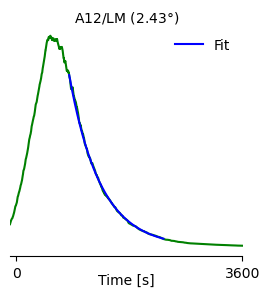

A13/S-IVB,4.481,552.4,444.50,0.40,0.50,300,1500,1228.8


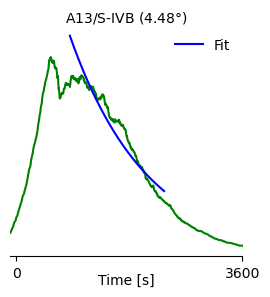

A14/LM,2.167,521.3,444.50,0.40,0.50,300,1500,462.5


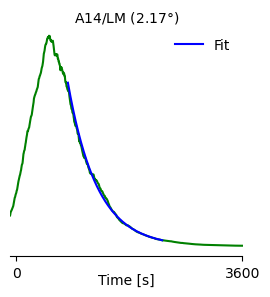

A14/LM,3.804,665.8,444.50,0.40,0.50,300,1500,591.8


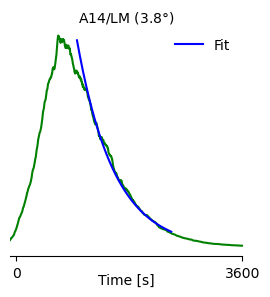

A14/S-IVB,5.784,795.3,444.50,0.40,0.50,300,1500,761.6


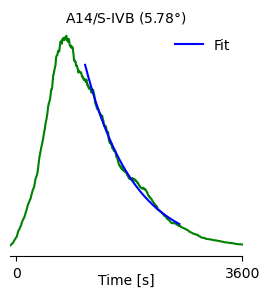

A15/LM,3.04,708.0,444.50,0.40,0.50,300,1500,706.1


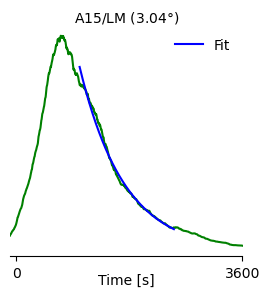

to be excluded
A15/LM,34.561,749.3,444.50,0.40,0.50,300,1500,976.1


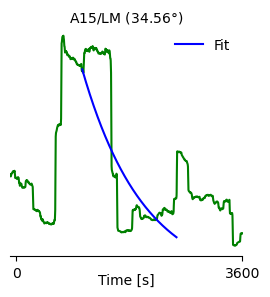

to be excluded
A15/LM,37.235,1137.4,444.50,0.40,0.50,300,1500,6477.0


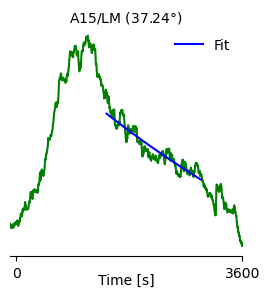

A15/S-IVB,6.119,544.7,444.50,0.40,0.50,300,1500,837.1


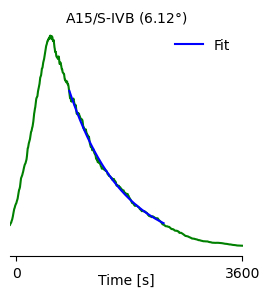

A15/S-IVB,11.719,955.8,444.50,0.40,0.50,300,1500,1020.0


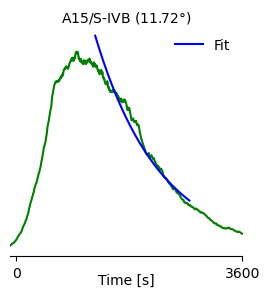

A16/S-IVB,5.075,928.0,444.50,0.40,0.50,300,1500,819.3


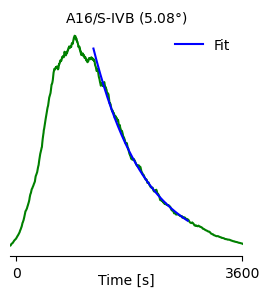

No observations found at this distance
A16/S-IVB,36.377,1133.0,444.50,0.40,0.50,300,1500,1895.6


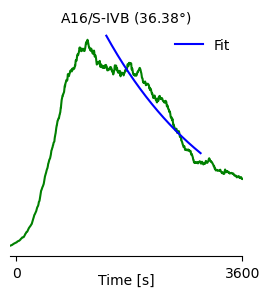

A17/LM,25.432,1149.4,444.50,0.40,0.50,300,1500,2453.2


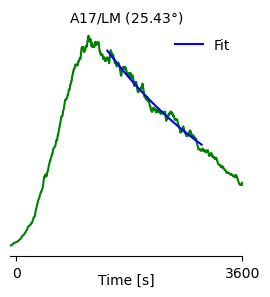

A17/LM,32.487,1666.4,444.50,0.40,0.50,300,1500,1332.1


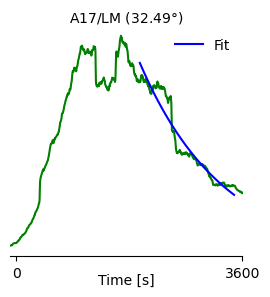

No observations found at this distance
A17/LM,57.671,1418.5,444.50,0.40,0.50,300,1500,1390.1


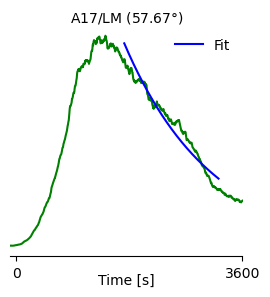

No observations found at this distance
A17/S-IVB,11.132,923.0,444.50,0.40,0.50,300,1500,1038.3


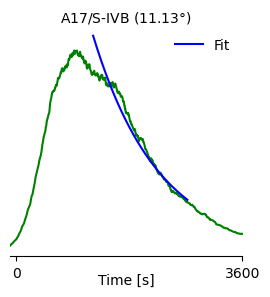

A17/S-IVB,28.047,959.1,444.50,0.40,0.50,300,1500,1062.6


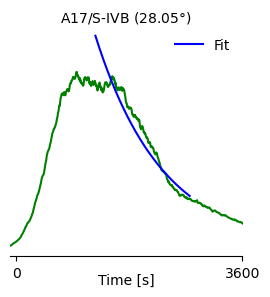

A17/S-IVB,34.018,1420.1,444.50,0.40,0.50,300,1500,1493.5


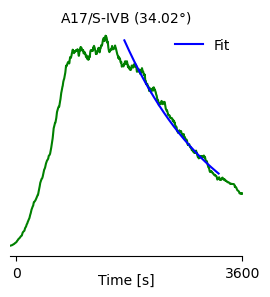

A13/S-IVB,4.481,552.4,444.50,0.40,0.50,300,1500,1228.8
A14/S-IVB,5.784,795.3,444.50,0.40,0.50,300,1500,761.6
A15/S-IVB,6.119,544.7,444.50,0.40,0.50,300,1500,837.1
A15/S-IVB,11.719,955.8,444.50,0.40,0.50,300,1500,1020.0
A16/S-IVB,5.075,928.0,444.50,0.40,0.50,300,1500,819.3
No observations found at this distance
A16/S-IVB,36.377,1133.0,444.50,0.40,0.50,300,1500,1895.6
No observations found at this distance
A17/S-IVB,11.132,923.0,444.50,0.40,0.50,300,1500,1038.3
A17/S-IVB,28.047,959.1,444.50,0.40,0.50,300,1500,1062.6
A17/S-IVB,34.018,1420.1,444.50,0.40,0.50,300,1500,1493.5
A12/LM,2.425,542.4,444.50,0.40,0.50,300,1500,495.7
A14/LM,2.167,521.3,444.50,0.40,0.50,300,1500,462.5
A14/LM,3.804,665.8,444.50,0.40,0.50,300,1500,591.8
A15/LM,3.04,708.0,444.50,0.40,0.50,300,1500,706.1
A17/LM,25.432,1149.4,444.50,0.40,0.50,300,1500,2453.2
A17/LM,32.487,1666.4,444.50,0.40,0.50,300,1500,1332.1
No observations found at this distance
A17/LM,57.671,1418.5,444.50,0.40,0.50,300,1500,1390.1


In [58]:
# Calculate tmax and Qc from the observations  

# filtered between 0.4 - 0.5 Hz to compare with observations 
# smoothed over 200 periods (around 445 s)
# td - characteristic decay time - is calculated from 300 s after tmax for 1500 s.
# we use linear regression 
# The observation at 32.561 is quite noisy and excluded from the results table


# These are the params from Gillet et al., 2017
# They make observations at 0.5 Hz. 
# Gillet shows no particular dependence of Qc on the start time after tmax.
# Gillet tmax measurements begin with the smoothing of the energy envelope of the signal to reduce the 
# fluctuations and facilitate the detection of the maximum. The smoothing procedure consists in replacing 
# the instantaneous intensity by its running average in a time window of typical duration 10 periods 
# (about 20 s for low frequency signals,
# alpha = 0
# For calculating td they use a smoothing window of 200 periods for impacts and shallow moonquakes
# They perform this linear regression for several overlapping moving windows of 500 s duration, 
# starting from tmax on each signal, with a time step of approximately 300 s.
# They find no coda position dependence at 0.5 Hz, so we just use the first window. 



# Get the tmax - original_observation_stream_local_MH
original_observation_stream_local_MH.sort(keys=['title','distance_in_degree'])

for tr in original_observation_stream_local_MH:

        observation_stream = Stream()
        observation_stream.append(tr)

        if math.isclose(tr.stats.distance_in_degree,34.561,abs_tol=0.01):
            # exluding event at 34.561
            print('to be excluded:')

        if math.isclose(tr.stats.distance_in_degree,37.235,abs_tol=0.01):
            # exluding event at 37.235
            print('to be excluded:')

        plot_envelope_taup_quantitative(original_stream=None,
                           original_stream_dict=None,run_list=[],
                           observation_stream=observation_stream,distance_in_degree=tr.stats.distance_in_degree,
                           inv=inv,
                           # model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],model_taup_label='Model M1',
                                 title=None,
                                 pre_filt_env = [
                                    [0.3,0.4,0.5,0.6],
                                    ],
                                 startsecond=-100, endsecond=3600,channel='Z',
                                      normalize='relative', phase_list=["P"],
                                      smooth_periods=200,
                                      # taup_show=False,
                                      show_fig=True,
                                      Qc_calc=True,Qc_after_tmax=300,Qc_length=1500,
                                      # taup_show=False,
                                      save_fig=False,figsize=(3,3 )
                                     )

# S-IVB
for tr in original_observation_stream_local_MH:

        observation_stream = Stream()
        observation_stream.append(tr)

        if 'S-IVB' in tr.stats.title:
            plot_envelope_taup_quantitative(original_stream=None,
                               original_stream_dict=None,run_list=[],
                               observation_stream=observation_stream,distance_in_degree=tr.stats.distance_in_degree,
                               inv=inv,
                               # model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],model_taup_label='Model M1',
                                     title=None,
                                     pre_filt_env = [
                                        [0.3,0.4,0.5,0.6],
                                        ],
                                     startsecond=-100, endsecond=3600,channel='Z',
                                          normalize='relative', phase_list=["P"],
                                          smooth_periods=200,
                                          # taup_show=False,
                                          show_fig=False,
                                          Qc_calc=True,Qc_after_tmax=300,Qc_length=1500,
                                          # taup_show=False,
                                          save_fig=False,figsize=(3,3 )
                                         )

# LM

for tr in original_observation_stream_local_MH:

        observation_stream = Stream()
        observation_stream.append(tr)
        if 'LM' in tr.stats.title: 

            if math.isclose(tr.stats.distance_in_degree,34.561,abs_tol=0.01):
                # exluding event at 34.561
                continue  
            if math.isclose(tr.stats.distance_in_degree,37.235,abs_tol=0.01):
                # exluding event at 37.235
                continue
    
            plot_envelope_taup_quantitative(original_stream=None,
                               original_stream_dict=None,run_list=[],
                               observation_stream=observation_stream,distance_in_degree=tr.stats.distance_in_degree,
                               inv=inv,
                               # model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],model_taup_label='Model M1',
                                     title=None,
                                     pre_filt_env = [
                                        [0.3,0.4,0.5,0.6],
                                        ],
                                     startsecond=-100, endsecond=3600,channel='Z',
                                          normalize='relative', phase_list=["P"],
                                          smooth_periods=200,
                                          # taup_show=False,
                                          show_fig=False,
                                          Qc_calc=True,Qc_after_tmax=300,Qc_length=1500,
                                          # taup_show=False,
                                          save_fig=False,figsize=(3,3 )
                                         )

# # saved output to LM.csv and SIVB.csv


In [5]:
original_stream_dict = {}
original_stream_obs_dict = {}

############################################################################
# specify a run name
run = '145we_ISSI_atten_linear50_2'
run_title = "ISSI M1, ±50% scatter linear from 0 to 50 km, surface explosion"
short_title = "M-2"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

# ############################################################################
print('Models read in')


Min/Max R -2.577415 1.2928319
Min/Max T -1.341222 1.2182254
Min/Max Z -0.007234675 17.365479
Models read in


145we_ISSI_atten_linear50_2,4.0,475.1,444.60,0.40,0.50,300,1500,293.6


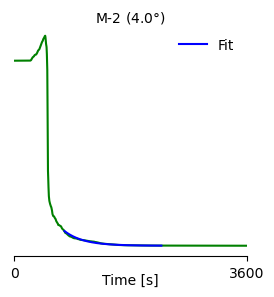

145we_ISSI_atten_linear50_2,8.0,521.0,444.60,0.40,0.50,300,1500,408.6


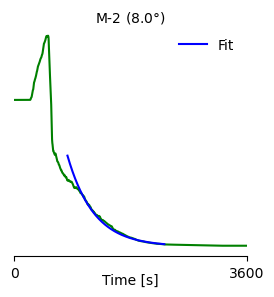

145we_ISSI_atten_linear50_2,12.0,523.5,444.60,0.40,0.50,300,1500,685.1


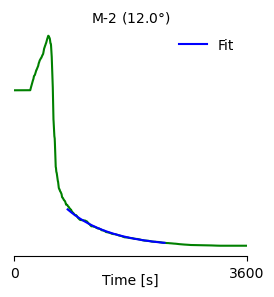

145we_ISSI_atten_linear50_2,16.0,557.5,444.60,0.40,0.50,300,1500,311.4


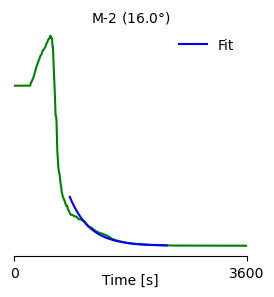

145we_ISSI_atten_linear50_2,20.0,599.4,444.60,0.40,0.50,300,1500,759.5


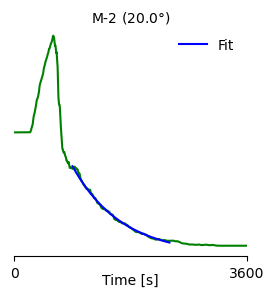

145we_ISSI_atten_linear50_2,24.0,675.4,444.60,0.40,0.50,300,1500,618.4


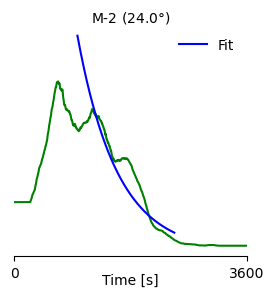

145we_ISSI_atten_linear50_2,28.0,654.7,444.60,0.40,0.50,300,1500,629.3


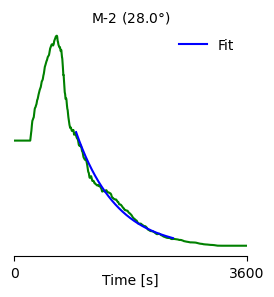

145we_ISSI_atten_linear50_2,32.0,728.3,444.60,0.40,0.50,300,1500,535.0


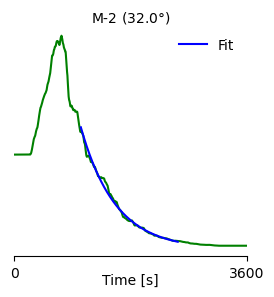

145we_ISSI_atten_linear50_2,36.0,703.6,444.60,0.40,0.50,300,1500,1052.9


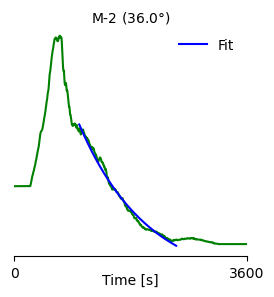

145we_ISSI_atten_linear50_2,40.0,770.7,444.60,0.40,0.50,300,1500,672.0


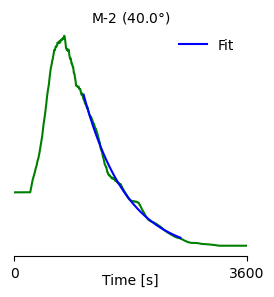

145we_ISSI_atten_linear50_2,44.0,655.2,444.60,0.40,0.50,300,1500,318.0


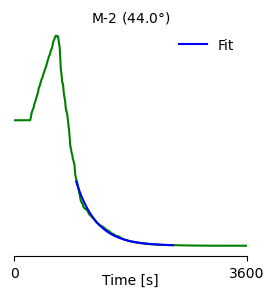

145we_ISSI_atten_linear50_2,48.0,667.3,444.60,0.40,0.50,300,1500,386.8


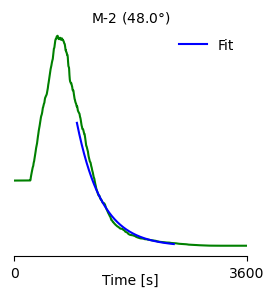

145we_ISSI_atten_linear50_2,52.0,867.2,444.60,0.40,0.50,300,1500,981.7


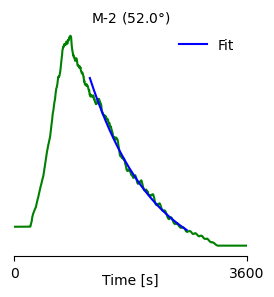

145we_ISSI_atten_linear50_2,56.0,763.5,444.60,0.40,0.50,300,1500,339.8


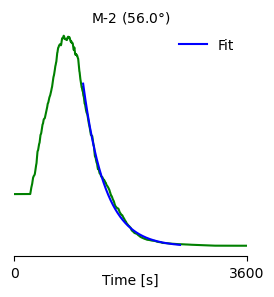

145we_ISSI_atten_linear50_2,60.0,687.3,444.60,0.40,0.50,300,1500,390.8


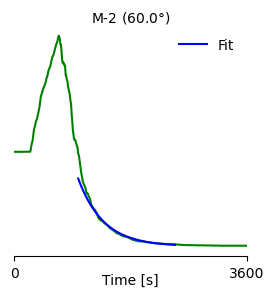

145we_ISSI_atten_linear50_2,4.0,475.1,444.60,0.40,0.50,300,1500,293.6
145we_ISSI_atten_linear50_2,8.0,521.0,444.60,0.40,0.50,300,1500,408.6
145we_ISSI_atten_linear50_2,12.0,523.5,444.60,0.40,0.50,300,1500,685.1
145we_ISSI_atten_linear50_2,16.0,557.5,444.60,0.40,0.50,300,1500,311.4
145we_ISSI_atten_linear50_2,20.0,599.4,444.60,0.40,0.50,300,1500,759.5
145we_ISSI_atten_linear50_2,24.0,675.4,444.60,0.40,0.50,300,1500,618.4
145we_ISSI_atten_linear50_2,28.0,654.7,444.60,0.40,0.50,300,1500,629.3
145we_ISSI_atten_linear50_2,32.0,728.3,444.60,0.40,0.50,300,1500,535.0
145we_ISSI_atten_linear50_2,36.0,703.6,444.60,0.40,0.50,300,1500,1052.9
145we_ISSI_atten_linear50_2,40.0,770.7,444.60,0.40,0.50,300,1500,672.0
145we_ISSI_atten_linear50_2,44.0,655.2,444.60,0.40,0.50,300,1500,318.0
145we_ISSI_atten_linear50_2,48.0,667.3,444.60,0.40,0.50,300,1500,386.8
145we_ISSI_atten_linear50_2,52.0,867.2,444.60,0.40,0.50,300,1500,981.7
145we_ISSI_atten_linear50_2,56.0,763.5,444.60,0.40,0.50,300,1500,339.8
145we_I

In [7]:
# Calculate tmax and Qc from simulation 145we_ISSI_atten_linear50_2  

############################################################################
# specify a run name
run = '145we_ISSI_atten_linear50_2'
run_title = "ISSI M1, ±50% scatter linear from 0 to 50 km, surface explosion"
short_title = "M-2"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

original_stream_dict[run].sort(keys=['distance_in_degree'])

# Calculate tmax and Qc from simulation M-2 

# filtered between 0.4 - 0.5 Hz to compare with observations 
# smoothed for around 45 s
# td - characteristic decay time - is calculated from 300 s after tmax for 1500 s.
# we use linear regression 

for tr in original_stream_dict[run].select(channel='Z'):
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 61:
        simulation_stream = Stream()
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        # elif tr.stats.distance_in_degree < 3.9:
        #     simulation_stream.append(tr) 

        if len(simulation_stream) > 0:

            plot_envelope_taup_quantitative(original_stream=simulation_stream,
                               original_stream_dict=None,run_list=[],
                               observation_stream=None,distance_in_degree=tr.stats.distance_in_degree,
                               inv=None,
                               # model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],model_taup_label='Model M1',
                                     title=None,
                                     pre_filt_env = [
                                        [0.3,0.4,0.5,0.6],
                                        ],
                                 startsecond=0, endsecond=3600,channel='Z',
                                      normalize='relative', phase_list=["P"],
                                      smooth_periods=200,
                                      # taup_show=False,
                                      show_fig=True,
                                      Qc_calc=True,Qc_after_tmax=300,Qc_length=1500,
                                      # taup_show=False,
                                      save_fig=False,figsize=(3,3 )
                                         )

for tr in original_stream_dict[run].select(channel='Z'):
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 61:
        simulation_stream = Stream()
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        # elif tr.stats.distance_in_degree < 3.9:
        #     simulation_stream.append(tr) 

        if len(simulation_stream) > 0:

            plot_envelope_taup_quantitative(original_stream=simulation_stream,
                               original_stream_dict=None,run_list=[],
                               observation_stream=None,distance_in_degree=tr.stats.distance_in_degree,
                               inv=None,
                               # model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],model_taup_label='Model M1',
                                     title=None,
                                     pre_filt_env = [
                                        [0.3,0.4,0.5,0.6],
                                        ],
                                 startsecond=0, endsecond=3600,channel='Z',
                                      normalize='relative', phase_list=["P"],
                                      smooth_periods=200,
                                      # taup_show=False,
                                      show_fig=False,
                                      Qc_calc=True,Qc_after_tmax=300,Qc_length=1500,
                                      # taup_show=False,
                                      save_fig=False,figsize=(3,3 )
                                         )

# Note that the simulation at 24 degrees appears to have to resonances, which make the rise time much later - 1599.3 s. 
# saved to output_files/145we_ISSI_atten_linear50_2.csv

## Section 3 - Comparison Figures

1
A14/LM,2.167,410.2,22.30,0.40,0.50
145we_ISSI_atten_linear50_2,2.167,341.6,22.50,0.40,0.50
./temp/fig_2024-09-13T22:34:10.336251Z.png


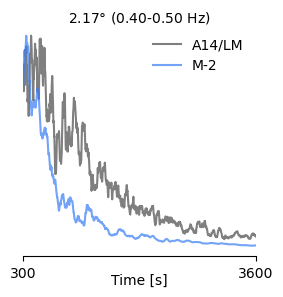

1
A17/S-IVB,28.047,907.0,22.30,0.40,0.50
145we_ISSI_atten_linear50_2,28.047,375.9,22.50,0.40,0.50
./temp/fig_2024-09-13T22:34:10.425672Z.png


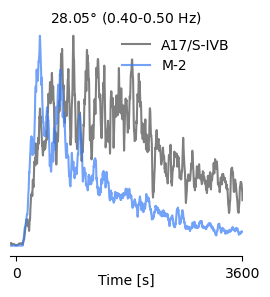

1
A17/LM,57.671,1649.6,22.30,0.40,0.50
145we_ISSI_atten_linear50_2,57.671,449.2,22.50,0.40,0.50
./temp/fig_2024-09-13T22:34:10.515188Z.png


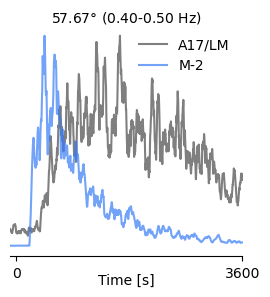

In [69]:
# Figure 14 (top) - Coda Decay

run_list = [
    '145we_ISSI_atten_linear50_2',
]

pre_filt_env = [
    [0.3,0.4,0.5,0.6],
]

# starts at 300 s to remove initial peak
plot_envelope_taup_quantitative(original_stream=None,
                   original_stream_dict=original_stream_dict,run_list=run_list,
                   observation_stream=original_observation_stream_local_MH,distance_in_degree=distance_examples[2],
                   inv=inv,
                         title=None,
                              # freqmin=freqmin,freqmax=freqmax,
                                     pre_filt_env = pre_filt_env,
                         startsecond=300, endsecond=3600,channel='Z',
                              normalize='relative', phase_list=["P"],
                              smooth_periods=10,
                              # taup_show=False,
                              save_fig=True,figsize=(3,3 )
                             )

plot_envelope_taup_quantitative(original_stream=None,
                   original_stream_dict=original_stream_dict,run_list=run_list,
                   observation_stream=original_observation_stream_local_MH,distance_in_degree=distance_examples[28],
                   inv=inv,
                         title=None,
                              # freqmin=freqmin,freqmax=freqmax,
                                     pre_filt_env = pre_filt_env,
                         startsecond=-100, endsecond=3600,channel='Z',
                              normalize='relative', phase_list=["P"],
                              smooth_periods=10,
                              # taup_show=False,
                              save_fig=True,figsize=(3,3 )
                             )

plot_envelope_taup_quantitative(original_stream=None,
                   original_stream_dict=original_stream_dict,run_list=run_list,
                   observation_stream=original_observation_stream_local_MH,distance_in_degree=distance_examples[57],
                   inv=inv,
                         title=None,
                              # freqmin=freqmin,freqmax=freqmax,
                                     pre_filt_env = pre_filt_env,
                         startsecond=-100, endsecond=3600,channel='Z',
                              normalize='relative', phase_list=["P"],
                              smooth_periods=10,
                              # taup_show=False,
                              save_fig=True,figsize=(3,3 )
                             )

1
A17/S-IVB,28.047,907.0,22.30,0.40,0.50
145we_ISSI_atten_linear50_2,28.047,375.9,22.50,0.40,0.50
./temp/fig_2024-09-13T22:35:11.378034Z.png


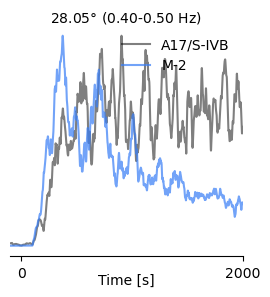

In [76]:
plot_envelope_taup_quantitative(original_stream=None,
                   original_stream_dict=original_stream_dict,run_list=run_list,
                   observation_stream=original_observation_stream_local_MH,distance_in_degree=distance_examples[28],
                   inv=inv,
                         title=None,
                              # freqmin=freqmin,freqmax=freqmax,
                                     pre_filt_env = pre_filt_env,
                         startsecond=-100, endsecond=2000,channel='Z',
                              normalize='relative', phase_list=["P"],
                              smooth_periods=10,
                              # taup_show=False,
                              save_fig=True,figsize=(3,3 )
                             )

1
A14/LM,2.167,149.9,11.20,0.40,0.50
145we_ISSI_atten_linear50_2,2.167,48.0,11.40,0.40,0.50
Source Depth=0 km, Distance in degrees 2.167025997371414
Suppressing secondary arrivals
15.616848356338547
./temp/fig_2024-09-13T04:38:36.012699Z.png


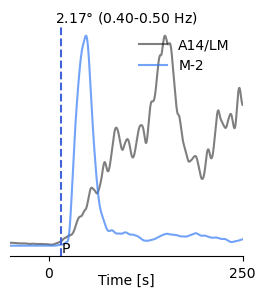

1
A17/S-IVB,28.047,575.2,11.20,0.40,0.50
145we_ISSI_atten_linear50_2,28.047,366.3,11.40,0.40,0.50
Source Depth=0 km, Distance in degrees 28.047339965833054
Suppressing secondary arrivals
120.62561533212649
Suppressing secondary arrivals
120.62561533212649
./temp/fig_2024-09-13T04:38:36.132872Z.png


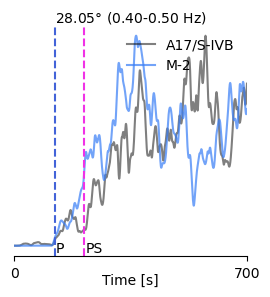

1
A17/LM,57.671,992.4,11.20,0.40,0.50
145we_ISSI_atten_linear50_2,57.671,441.8,11.40,0.40,0.50
Source Depth=0 km, Distance in degrees 57.67071530277473
Suppressing secondary arrivals
227.84401409201135
Suppressing secondary arrivals
227.84401409201135
./temp/fig_2024-09-13T04:38:36.252967Z.png


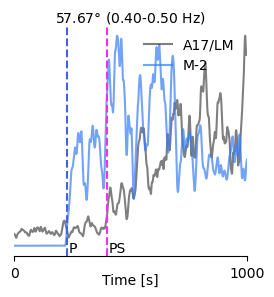

In [26]:
# Figure 14 (bottom) - onset

run_list = [
    '145we_ISSI_atten_linear50_2',
]

pre_filt_env = [
    [0.3,0.4,0.5,0.6],
]

plot_envelope_taup_quantitative(original_stream=None,
                   original_stream_dict=original_stream_dict,run_list=run_list,
                   observation_stream=original_observation_stream_local_MH,distance_in_degree=distance_examples[2],
                   inv=inv,
                    model_taup=calculated_taup_dict[model_taup],
                    # model_taup_label=None,
                    taup_show=True,
                         title=None,
                              source_depth_in_km=0,
                              # freqmin=freqmin,freqmax=freqmax,
                                     pre_filt_env = pre_filt_env,
                         startsecond=-50, endsecond=250,channel='Z',
                              normalize='relative', phase_list=["P"],
                              smooth_periods=5,
                              # taup_show=False,
                              save_fig=True,figsize=(3,3 )
                             )

plot_envelope_taup_quantitative(original_stream=None,
                   original_stream_dict=original_stream_dict,run_list=run_list,
                   observation_stream=original_observation_stream_local_MH,distance_in_degree=distance_examples[28],
                   inv=inv,
                    model_taup=calculated_taup_dict[model_taup],
                    # model_taup_label=None,
                    taup_show=True,
                         title=None,
                              source_depth_in_km=0,
                              # freqmin=freqmin,freqmax=freqmax,
                                     pre_filt_env = pre_filt_env,
                         startsecond=0, endsecond=700,channel='Z',
                              normalize='relative', phase_list=["P",'PS'],
                              smooth_periods=5,
                              # taup_show=False,
                              save_fig=True,figsize=(3,3 )
                             )


plot_envelope_taup_quantitative(original_stream=None,
                   original_stream_dict=original_stream_dict,run_list=run_list,
                   observation_stream=original_observation_stream_local_MH,distance_in_degree=distance_examples[57],
                   inv=inv,
                    model_taup=calculated_taup_dict[model_taup],
                    # model_taup_label=None,
                    taup_show=True,
                         title=None,
                              source_depth_in_km=0,
                              # freqmin=freqmin,freqmax=freqmax,
                                     pre_filt_env = pre_filt_env,
                         startsecond=0, endsecond=1000,channel='Z',
                              normalize='relative', phase_list=["P",'PS'],
                              smooth_periods=5,
                              # taup_show=False,
                              save_fig=True,figsize=(3,3 )
                             )

In [11]:
# In Blanchette-Guertin et al., 2012, for natural impacts, lowest frequencies take longest to rise

A14/LM,2.167,217.0,66.70,0.10,0.20
A14/LM,2.167,144.8,22.30,0.40,0.50
A14/LM,2.167,388.7,11.80,0.80,0.90
./temp/fig_2024-09-13T05:20:00.348838Z.png


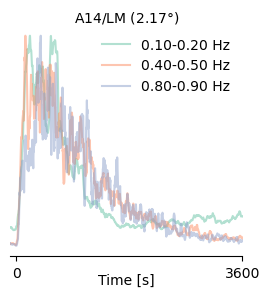

A17/S-IVB,28.047,425.8,66.70,0.10,0.20
A17/S-IVB,28.047,907.0,22.30,0.40,0.50
A17/S-IVB,28.047,633.6,11.80,0.80,0.90
./temp/fig_2024-09-13T05:20:00.476667Z.png


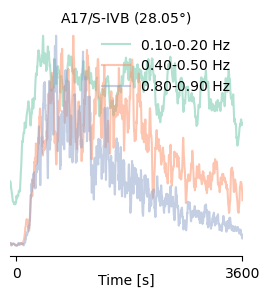

A17/LM,57.671,1649.6,22.30,0.40,0.50
A17/LM,57.671,1313.2,11.80,0.80,0.90
./temp/fig_2024-09-13T05:20:00.590507Z.png


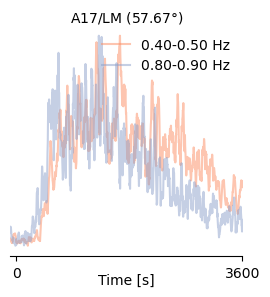

In [29]:
# Figure 15 (top) - Comparing frequency dependence - observations 


pre_filt_env = [
    [0.05,0.1,0.2,0.3],
    [0.3,0.4,0.5,0.6],       
    [0.7,0.8,0.9,1.0],   
    ]

pre_filt_colors = [
    col1, # [0.05,0.1,0.2,0.3],
    col2, # [0.3,0.4,0.5,0.6],  
    col3, # [0.7,0.8,0.9,1.0], 
    ]

plot_envelope_taup_quantitative(original_stream=None,
                   original_stream_dict=None,run_list=[],
                   observation_stream=original_observation_stream_local_MH,distance_in_degree=distance_examples[2],
                   inv=inv,title=None,pre_filt_env=pre_filt_env,pre_filt_colors=pre_filt_colors,
                   startsecond=-100, endsecond=3600,channel='Z',
                              normalize='relative', phase_list=["P"],
                              smooth_periods=10,
                              # taup_show=False,
                              save_fig=True,figsize=(3,3 )
                             )

pre_filt_env = [
    [0.05,0.1,0.2,0.3],
    [0.3,0.4,0.5,0.6],  
    [0.7,0.8,0.9,1.0],   
    ]

pre_filt_colors = [
    col1, # [0.05,0.1,0.2,0.3],
    col2, # [0.3,0.4,0.5,0.6], 
    col3, # [0.7,0.8,0.9,1.0], 
    ]

plot_envelope_taup_quantitative(original_stream=None,
                   original_stream_dict=None,run_list=[],
                   observation_stream=original_observation_stream_local_MH,distance_in_degree=distance_examples[28],
                   inv=inv,title=None,pre_filt_env=pre_filt_env,pre_filt_colors=pre_filt_colors,
                   startsecond=-100, endsecond=3600,channel='Z',
                              normalize='relative', phase_list=["P"],
                              smooth_periods=10,
                              # taup_show=False,
                              save_fig=True,figsize=(3,3 )
                             )

pre_filt_env = [
    # [0.05,0.1,0.2,0.3],
    [0.3,0.4,0.5,0.6],  
    [0.7,0.8,0.9,1.0],   
    ]

pre_filt_colors = [
    # col1, # [0.05,0.1,0.2,0.3],
    col2, # [0.3,0.4,0.5,0.6], 
    col3, # [0.7,0.8,0.9,1.0], 
    ]

plot_envelope_taup_quantitative(original_stream=None,
                   original_stream_dict=None,run_list=[],
                   observation_stream=original_observation_stream_local_MH,distance_in_degree=distance_examples[57],
                   inv=inv,title=None,pre_filt_env=pre_filt_env,pre_filt_colors=pre_filt_colors,
                   startsecond=-100, endsecond=3600,channel='Z',
                              normalize='relative', phase_list=["P"],
                              smooth_periods=10,
                              # taup_show=False,
                              save_fig=True,figsize=(3,3 )
                             )

145we_ISSI_atten_linear50_2,2.167,87.7,66.90,0.10,0.20
145we_ISSI_atten_linear50_2,2.167,57.8,22.50,0.40,0.50
./temp/fig_2024-09-13T04:49:40.522274Z.png


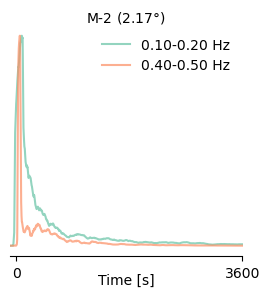

145we_ISSI_atten_linear50_2,28.047,560.0,66.90,0.10,0.20
145we_ISSI_atten_linear50_2,28.047,375.9,22.50,0.40,0.50
./temp/fig_2024-09-13T04:49:40.590335Z.png


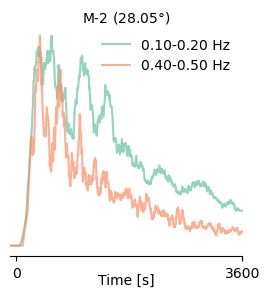

145we_ISSI_atten_linear50_2,57.671,535.8,66.90,0.10,0.20
145we_ISSI_atten_linear50_2,57.671,449.2,22.50,0.40,0.50
./temp/fig_2024-09-13T04:49:40.664819Z.png


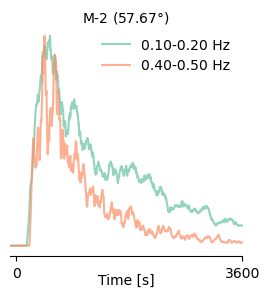

In [27]:
# Figure 15 (bottom) - Comparing frequency dependence - 145we_ISSI_atten_linear50_2 

run_list = [
    '145we_ISSI_atten_linear50_2',
]

pre_filt_env = [
    [0.05,0.1,0.2,0.3],
    [0.3,0.4,0.5,0.6],             
    ]

pre_filt_colors = [
    col1, # [0.05,0.1,0.2,0.3],
    col2, # [0.3,0.4,0.5,0.6], 
    ]

plot_envelope_taup_quantitative(original_stream=None,
                   original_stream_dict=original_stream_dict,run_list=run_list,
                   observation_stream=None,distance_in_degree=distance_examples[2],
                   inv=inv,title=None,pre_filt_env=pre_filt_env,pre_filt_colors=pre_filt_colors,
                   startsecond=-100, endsecond=3600,channel='Z',
                              normalize='relative', phase_list=["P"],
                              smooth_periods=10,
                              # taup_show=False,
                              save_fig=True,figsize=(3,3 )
                             )

plot_envelope_taup_quantitative(original_stream=None,
                   original_stream_dict=original_stream_dict,run_list=run_list,
                   observation_stream=None,distance_in_degree=distance_examples[28],
                   inv=inv,title=None,pre_filt_env=pre_filt_env,pre_filt_colors=pre_filt_colors,
                   startsecond=-100, endsecond=3600,channel='Z',
                              normalize='relative', phase_list=["P"],
                              smooth_periods=10,
                              # taup_show=False,
                              save_fig=True,figsize=(3,3 )
                             )


plot_envelope_taup_quantitative(original_stream=None,
                   original_stream_dict=original_stream_dict,run_list=run_list,
                   observation_stream=None,distance_in_degree=distance_examples[57],
                   inv=inv,title=None,pre_filt_env=pre_filt_env,pre_filt_colors=pre_filt_colors,
                   startsecond=-100, endsecond=3600,channel='Z',
                              normalize='relative', phase_list=["P"],
                              smooth_periods=10,
                              # taup_show=False,
                              save_fig=True,figsize=(3,3 )
                             )

## Section 4 - Figures for Quantitative Estimates

./output_files/LM.csv 521.3 1666.4
./output_files/SIVB.csv 544.7 1420.1
./output_files/145we_ISSI_atten_linear50_2.csv 475.1 867.2


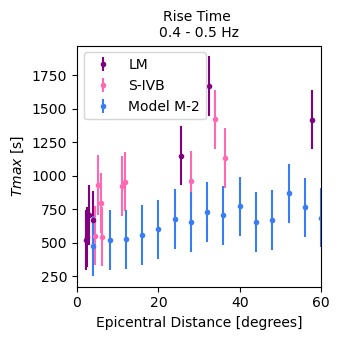

In [84]:
# Figure 16 (left) - Rise Time

files = [
         './output_files/LM.csv',
        './output_files/SIVB.csv',
        './output_files/145we_ISSI_atten_linear50_2.csv',
         ]
labels = [
    'LM', 
    'S-IVB',
    'Model M-2'
]
colors = [
'#800080',
'#FF69B4',
'#377DF6',  
]


plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'axes.titlesize' : 'medium'})
fig = plt.figure(figsize=(3.5,3.5)) 

freqmin1 = 0.4
freqmax1 = 0.5
freqmid = np.array(freqmin1) + ((np.array(freqmax1) - np.array(freqmin1))/2)

for file, l, c in zip(files, labels, colors):
    df_model = pd.read_csv(file, sep=',',skiprows=0,skipinitialspace=0,comment='#')
    distance_in_degree = df_model['distance_in_degree'].tolist()
    td = df_model['td'].tolist()
    freqmin = df_model['freqmin'].tolist()
    freqmax = df_model['freqmax'].tolist()
    tmax = df_model['tmax'].tolist()
    for f in freqmin:
        if not math.isnan(f) and f != freqmin1:
            print('freqmin is different') 
            break
    for f in freqmax:
        if not math.isnan(f) and f != freqmax1:
            print('freqmax is different') 
            break
    # Equation 4, Blanchette-Guertin et al, 2013
    # calculate Qc
    Qc = [(td1 * np.pi * freqmid) for td1 in td]
    smoothing_length = df_model['smoothing_length'].tolist()
    smoothing_length2 = [x/2 for x in smoothing_length]
    plt.errorbar(distance_in_degree, tmax, yerr=smoothing_length2, fmt="o", label=l, markersize=3, color=c )
    print(file, min(tmax), max(tmax))

# note that some of the observations were excluded (see above) 
# plt.xlim(0,61)
plt.xlabel('Epicentral Distance [degrees]')
plt.ylabel(r'$T{max}$ [s]')

# r'W1 disk and central $\pm2^\circ$ subtracted'
plt.legend(loc='upper left')
plt.title('Rise Time \n{} - {} Hz'.format(freqmin1, freqmax1))
plt.xlim(0,60)
# plt.ylim(0,1700)
plt.tight_layout()
fig_name = 'fig_{}.png'.format(UTCDateTime.now())
fig_name = os.path.join('./temp/',fig_name)
plt.savefig(fig_name)


plt.show()

2453.2
1895.6
1052.9


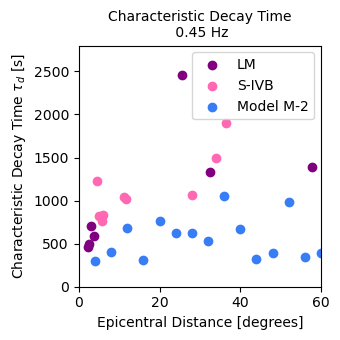

In [86]:
# Figure 16 (right) - Characteristic Decay Time

files = [
         './output_files/LM.csv',
        './output_files/SIVB.csv',
        './output_files/145we_ISSI_atten_linear50_2.csv',
         ]
labels = [
    'LM', 
    'S-IVB',
    'Model M-2'
]
colors = [
'#800080',
'#FF69B4',
'#377DF6',  
]

freqmin1 = 0.4
freqmax1 = 0.5
freqmid = np.array(freqmin1) + ((np.array(freqmax1) - np.array(freqmin1))/2)

plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'axes.titlesize' : 'medium'})
fig = plt.figure(figsize=(3.5,3.5)) 

for file, l, c in zip(files, labels, colors):
    df_model = pd.read_csv(file, sep=',',skiprows=0,skipinitialspace=0,comment='#')
    distance_in_degree = df_model['distance_in_degree'].tolist()
    td = df_model['td'].tolist()
    freqmin = df_model['freqmin'].tolist()
    freqmax = df_model['freqmax'].tolist()
    for f in freqmin:
        if not math.isnan(f) and f != freqmin1:
            print('freqmin is different') 
            break
    for f in freqmax:
        if not math.isnan(f) and f != freqmax1:
            print('freqmax is different') 
            break
    # Equation 4, Blanchette-Guertin et al, 2013
    # calculate Qc
    Qc = [(td1 * np.pi * freqmid) for td1 in td]
    smoothing_length = df_model['smoothing_length'].tolist()
    # freq_min
    plt.scatter(distance_in_degree, td, label=l, color=c )
    print(max(td))

# plt.xlim(0,61)
plt.xlabel('Epicentral Distance [degrees]')
plt.ylabel(r'Characteristic Decay Time $\tau_{d}$ [s]')

# r'W1 disk and central $\pm2^\circ$ subtracted'
plt.legend(loc='upper right')
plt.title('Characteristic Decay Time\n {} Hz'.format(freqmid))
plt.xlim(0,60)
plt.ylim(0,2800)
# note that some of the observations were excluded (see above) 
plt.tight_layout()
fig_name = 'fig_{}.png'.format(UTCDateTime.now())
fig_name = os.path.join('./temp/',fig_name)
plt.savefig(fig_name)


plt.show()

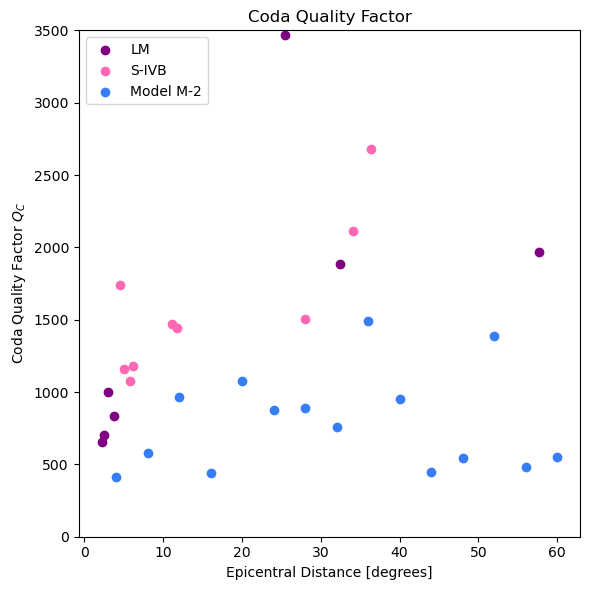

In [13]:
# Figure X1 (not in the paper) - Coda Quality Factor - not included in the paper

files = [
         './output_files/LM.csv',
        './output_files/SIVB.csv',
        './output_files/145we_ISSI_atten_linear50_2.csv',
         ]
labels = [
    'LM', 
    'S-IVB',
    'Model M-2'
]
colors = [
'#800080',
'#FF69B4',
'#377DF6',  
]


plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'axes.titlesize' : 'large'})
fig = plt.figure(figsize=(6,6)) 

freqmin1 = 0.4
freqmax1 = 0.5
freqmid = np.array(freqmin1) + ((np.array(freqmax1) - np.array(freqmin1))/2)

for f, l, c in zip(files, labels, colors):
    df_model = pd.read_csv(f, sep=',',skiprows=0,skipinitialspace=0,comment='#')
    distance_in_degree = df_model['distance_in_degree'].tolist()
    td = df_model['td'].tolist()
    freqmin = df_model['freqmin'].tolist()
    freqmax = df_model['freqmax'].tolist()
    for f in freqmin:
        if not math.isnan(f) and f != freqmin1:
            print('freqmin is different') 
            break
    for f in freqmax:
        if not math.isnan(f) and f != freqmax1:
            print('freqmax is different') 
            break
    # Equation 4, Blanchette-Guertin et al, 2013
    # calculate Qc
    Qc = [(td1 * np.pi * freqmid) for td1 in td]
    smoothing_length = df_model['smoothing_length'].tolist()
    # freq_min
    plt.scatter(distance_in_degree, Qc, label=l, color=c )
    


# plt.xlim(0,61)
plt.xlabel('Epicentral Distance [degrees]')
plt.ylabel(r'Coda Quality Factor $Q_{C}$')

# r'W1 disk and central $\pm2^\circ$ subtracted'
plt.legend(loc='upper left')
plt.title('Coda Quality Factor')
# Note that there is one outlier, which we are ignoring 
# plt.xlim(0,60)
plt.ylim(0,3500 )
plt.tight_layout()
fig_name = 'fig_{}.png'.format(UTCDateTime.now())
fig_name = os.path.join('./temp/',fig_name)
plt.savefig(fig_name)


plt.show()

## Section 5 - Comparing to Blanchette-Guertin 2012.

A14/LM,2.167,482.3,300.10,0.25,0.75,200,800,560.0


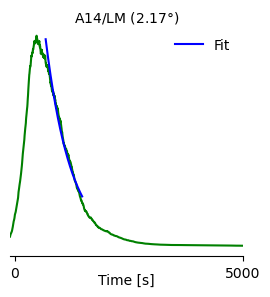

A12/LM,2.425,594.8,300.10,0.25,0.75,200,800,530.0


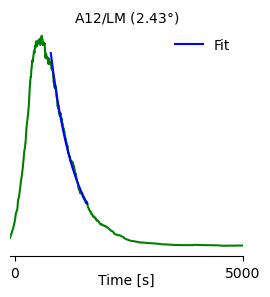

A15/LM,3.04,816.9,300.10,0.25,0.75,200,800,684.3


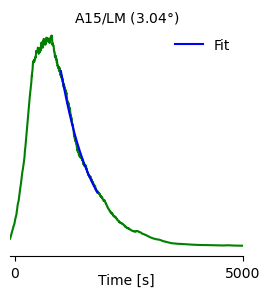

A14/LM,3.804,649.8,300.10,0.25,0.75,200,800,660.8


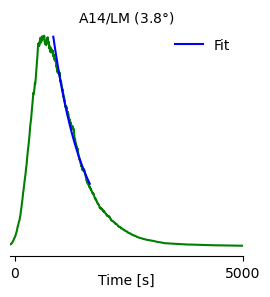

A13/S-IVB,4.481,390.9,300.10,0.25,0.75,200,800,1233.5


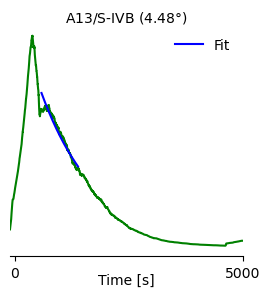

A16/S-IVB,5.075,681.3,300.10,0.25,0.75,200,800,1031.1


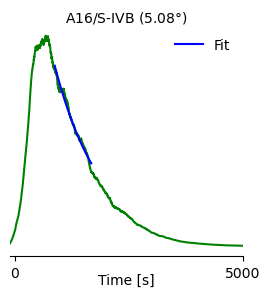

No observations found at this distance
A14/S-IVB,5.784,618.9,300.10,0.25,0.75,200,800,682.1


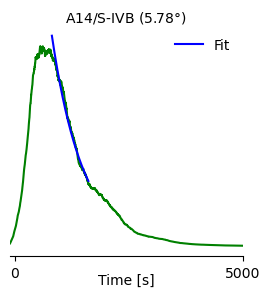

A15/S-IVB,6.119,487.5,300.10,0.25,0.75,200,800,874.3


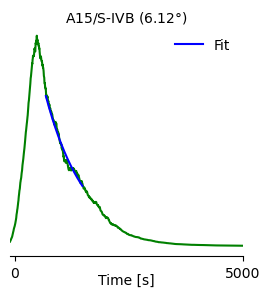

No observations found at this distance
A17/S-IVB,11.132,790.3,300.10,0.25,0.75,200,800,1177.4


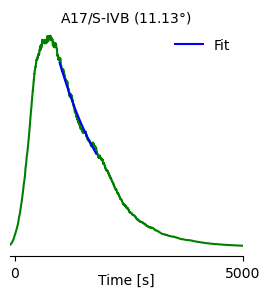

A15/S-IVB,11.719,720.5,300.10,0.25,0.75,200,800,1341.0


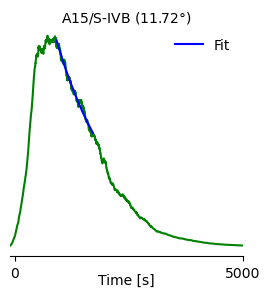

A17/LM,25.432,1037.7,300.10,0.25,0.75,200,800,1991.8


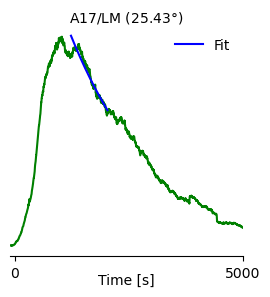

A17/S-IVB,28.047,849.0,300.10,0.25,0.75,200,800,1109.4


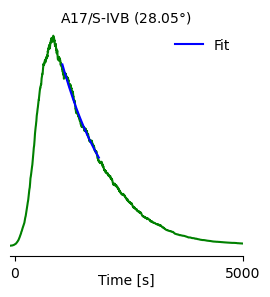

A17/LM,32.487,1088.3,300.10,0.25,0.75,200,800,15921.5


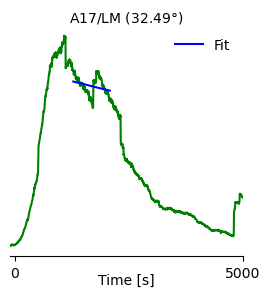

A17/S-IVB,34.018,808.6,300.10,0.25,0.75,200,800,2348.8


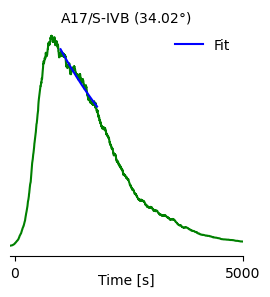

A15/LM,34.561,890.6,300.10,0.25,0.75,200,800,508.3


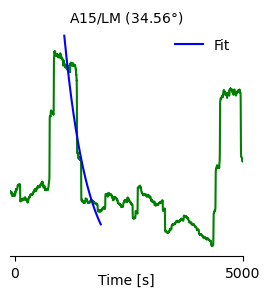

A16/S-IVB,36.377,932.2,300.10,0.25,0.75,200,800,1585.2


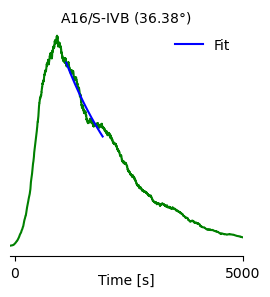

A15/LM,37.235,1091.0,300.10,0.25,0.75,200,800,1497.5


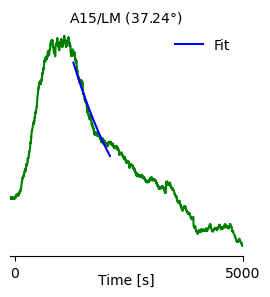

No observations found at this distance
A17/LM,57.671,1435.9,300.10,0.25,0.75,200,800,1134.4


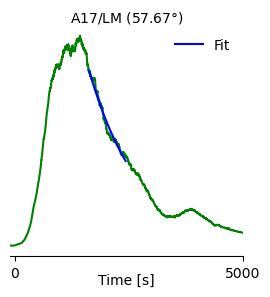

A14/LM,2.167,482.3,300.10,0.25,0.75,200,800,560.0
A12/LM,2.425,594.8,300.10,0.25,0.75,200,800,530.0
A15/LM,3.04,816.9,300.10,0.25,0.75,200,800,684.3
A14/LM,3.804,649.8,300.10,0.25,0.75,200,800,660.8
A13/S-IVB,4.481,390.9,300.10,0.25,0.75,200,800,1233.5
A16/S-IVB,5.075,681.3,300.10,0.25,0.75,200,800,1031.1
No observations found at this distance
A14/S-IVB,5.784,618.9,300.10,0.25,0.75,200,800,682.1
A15/S-IVB,6.119,487.5,300.10,0.25,0.75,200,800,874.3
No observations found at this distance
A17/S-IVB,11.132,790.3,300.10,0.25,0.75,200,800,1177.4
A15/S-IVB,11.719,720.5,300.10,0.25,0.75,200,800,1341.0
A17/LM,25.432,1037.7,300.10,0.25,0.75,200,800,1991.8
A17/S-IVB,28.047,849.0,300.10,0.25,0.75,200,800,1109.4
A17/LM,32.487,1088.3,300.10,0.25,0.75,200,800,15921.5
A17/S-IVB,34.018,808.6,300.10,0.25,0.75,200,800,2348.8
A15/LM,34.561,890.6,300.10,0.25,0.75,200,800,508.3
A16/S-IVB,36.377,932.2,300.10,0.25,0.75,200,800,1585.2
A15/LM,37.235,1091.0,300.10,0.25,0.75,200,800,1497.5
No observations found a

In [16]:
# These are similar parameters to Blanchette-Guertin et al., 2012. 
# smoothed using  5 min (LP) window (300 s) 
# filtered between 0.25 - 0.75 Hz
# The beginning of the fit was identified visually, as the exponential decay 
# does not always start at the maximum coda amplitude.
# The end of the fit was determined numerically and defined as the time at which 
# the envelope amplitude is twice the RMS background noise. Only those fits for which 
# td is less than the length of the fit were kept for the final analysis, resulting in 641 decay times.

# This one starts 200 s after tmax, and lasts for 800 s. 

# View the td - observations

# Get the tmax, and Qc - original_observation_stream_local_MH
original_observation_stream_local_MH.sort(keys=['distance_in_degree'])


for tr in original_observation_stream_local_MH:

        observation_stream = Stream()
        observation_stream.append(tr)

        if (math.isclose(tr.stats.distance_in_degree,34.561)):
            print('Exclude??')

        plot_envelope_taup_quantitative(original_stream=None,
                           original_stream_dict=None,run_list=[],
                           observation_stream=observation_stream,distance_in_degree=tr.stats.distance_in_degree,
                           inv=inv,
                           # model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],model_taup_label='Model M1',
                                 title=None,
                                 pre_filt_env = [
                                     [0.1,0.25,0.75,0.9],
                                    ],
                                 startsecond=-100, endsecond=5000,channel='Z',
                                      normalize='relative', phase_list=["P"],
                                      smooth_periods=150,
                                      # taup_show=False,
                                      show_fig=True,
                                      Qc_calc=True,Qc_after_tmax=200,Qc_length=800,
                                      # taup_show=False,
                                      save_fig=False,figsize=(3,3 )
                                     )
    
for tr in original_observation_stream_local_MH:

        observation_stream = Stream()
        observation_stream.append(tr)

        if (math.isclose(tr.stats.distance_in_degree,34.561)):
            print('Exclude??')
            
        plot_envelope_taup_quantitative(original_stream=None,
                           original_stream_dict=None,run_list=[],
                           observation_stream=observation_stream,distance_in_degree=tr.stats.distance_in_degree,
                           inv=inv,
                           # model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],model_taup_label='Model M1',
                                 title=None,
                                 pre_filt_env = [
                                     [0.1,0.25,0.75,0.9],
                                    ],
                                 startsecond=-100, endsecond=5000,channel='Z',
                                      normalize='relative', phase_list=["P"],
                                      smooth_periods=150,
                                      # taup_show=False,
                                      show_fig=False,
                                      Qc_calc=True,Qc_after_tmax=200,Qc_length=800,
                                      # taup_show=False,
                                      save_fig=False,figsize=(3,3 )
                                     )

# Exclude 34.561
# saved to BG2012_params.csv

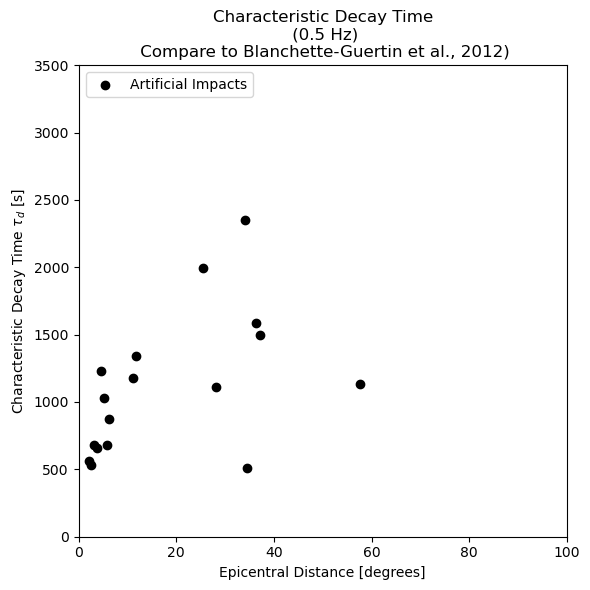

The measured characteristic decay times are similar to Blanchette-Guertin for 0.25 - 0.75 Hz. There is a group where td is greater than 
      3000, but these values are not well constrained.


In [17]:
# Comparing td to the observations from Blanchette-Guertin 2012

# Figure X2 (not in the paper) - Comparing td to the observations from Blanchette-Guertin 2012 - Characteristic Decay Time

files = [
         './output_files/BG2012_params.csv',
         ]
labels = [
    'Artificial Impacts', 
]
colors = [
'k',
]

freqmin1 = 0.25
freqmax1 = 0.75
freqmid = np.array(freqmin1) + ((np.array(freqmax1) - np.array(freqmin1))/2)

plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'axes.titlesize' : 'large'})
fig = plt.figure(figsize=(6,6)) 

for f, l, c in zip(files, labels, colors):
    df_model = pd.read_csv(f, sep=',',skiprows=0,skipinitialspace=0,comment='#')
    distance_in_degree = df_model['distance_in_degree'].tolist()
    td = df_model['td'].tolist()
    freqmin = df_model['freqmin'].tolist()
    freqmax = df_model['freqmax'].tolist()
    for f in freqmin:
        if not math.isnan(f) and f != freqmin1:
            print('freqmin is different') 
            break
    for f in freqmax:
        if not math.isnan(f) and f != freqmax1:
            print('freqmax is different') 
            break
    # Equation 4, Blanchette-Guertin et al, 2013
    # calculate Qc
    Qc = [(td1 * np.pi * freqmid) for td1 in td]
    smoothing_length = df_model['smoothing_length'].tolist()
    # freq_min
    plt.scatter(distance_in_degree, td, label=l, color=c )



# plt.xlim(0,61)
plt.xlabel('Epicentral Distance [degrees]')
plt.ylabel(r'Characteristic Decay Time $\tau_{d}$ [s]')

# r'W1 disk and central $\pm2^\circ$ subtracted'
plt.legend(loc='upper left')
plt.title('Characteristic Decay Time\n ({} Hz)\n Compare to Blanchette-Guertin et al., 2012)'.format(freqmid))
plt.xlim(0,100)
plt.ylim(0,3500)
plt.tight_layout()
fig_name = 'fig_{}.png'.format(UTCDateTime.now())
fig_name = os.path.join('./temp/',fig_name)
plt.savefig(fig_name)


plt.show()
print('''The measured characteristic decay times are similar to Blanchette-Guertin for 0.25 - 0.75 Hz. There is a group where td is greater than 
      3000, but these values are not well constrained.''')

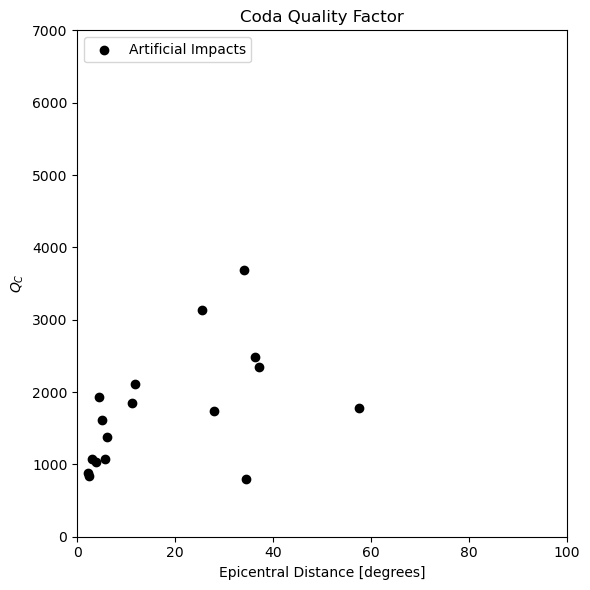

The measured characteristic decay times are similar to Blanchette-Guertin for 0.25 - 0.75 Hz. There is a group where Qc is greater than 
      3000, but these values are not well constrained.


In [88]:
# Comparing Qc to the observations from Blanchette-Guertin 2012

# # Figure X3 (not in the paper) -  - Comparing Qc to the observations from Blanchette-Guertin 2012 - Coda Quality Factor

files = [
         './output_files/BG2012_params.csv',
         ]
labels = [
    'Artificial Impacts', 
]
colors = [
'k',
]

freqmin1 = 0.25
freqmax1 = 0.75
freqmid = np.array(freqmin1) + ((np.array(freqmax1) - np.array(freqmin1))/2)

plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'axes.titlesize' : 'large'})
fig = plt.figure(figsize=(6,6)) 

for f, l, c in zip(files, labels, colors):
    df_model = pd.read_csv(f, sep=',',skiprows=0,skipinitialspace=0,comment='#')
    distance_in_degree = df_model['distance_in_degree'].tolist()
    td = df_model['td'].tolist()
    freqmin = df_model['freqmin'].tolist()
    freqmax = df_model['freqmax'].tolist()
    for f in freqmin:
        if not math.isnan(f) and f != freqmin1:
            print('freqmin is different') 
            break
    for f in freqmax:
        if not math.isnan(f) and f != freqmax1:
            print('freqmax is different') 
            break
    # Equation 4, Blanchette-Guertin et al, 2013
    # calculate Qc
    Qc = [(td1 * np.pi * freqmid) for td1 in td]
    smoothing_length = df_model['smoothing_length'].tolist()
    # freq_min
    plt.scatter(distance_in_degree, Qc, label=l, color=c )



# plt.xlim(0,61)
plt.xlabel('Epicentral Distance [degrees]')
plt.ylabel(r'$Q_{C}$')

# r'W1 disk and central $\pm2^\circ$ subtracted'
plt.legend(loc='upper left')
plt.title('Coda Quality Factor')
# there is an outlier which we are ignoring 
plt.xlim(0,100)
plt.ylim(0,7000 )
plt.tight_layout()
fig_name = 'fig_{}.png'.format(UTCDateTime.now())
fig_name = os.path.join('./temp/',fig_name)
plt.savefig(fig_name)


plt.show()
print('''The measured characteristic decay times are similar to Blanchette-Guertin for 0.25 - 0.75 Hz. There is a group where Qc is greater than 
      3000, but these values are not well constrained.''')

## Section 6 - Test of estimate of decay time code

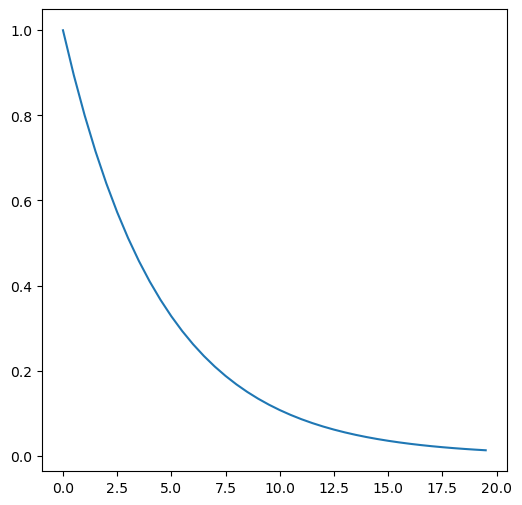

0.9999999999999997 4.481420117724552
0.3678794411714422


In [42]:
from postprocessing_util import fit_exp_linear 

# make a decay curve
fig = plt.figure(figsize=(6,6)) 
t = np.arange(0, 20, 0.5)
y = 0.8**t
plt.plot(t,y)
plt.show()

# test the function
A, td = fit_exp_linear(t, y)
print(A, td)

# calculate the value at the characteristic decay time 
print(0.8**td)

# The characteristic decay time is the time taken to 1/e of the initial value (36.8%) so 0.3678 is correct.
